In [25]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score





In [26]:
# Step 2: Load the Dataset
data = pd.read_csv('https://drive.google.com/uc?id=1faupcREQNNpea0SrMohTmyABQKdUJJUn&export=download')
# Step 3: Understand the Data
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [27]:
# Step 4: Data Preprocessing
data = data.dropna()
data = data[(data['Temperature (C)'] > -30) & (data['Temperature (C)'] < 50)]
data = data[(data['Humidity'] > 0) & (data['Humidity'] < 1)]
numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()

In [28]:
# Step 5: Feature Selection
X = data[numerical_features].drop(columns=['Temperature (C)'])
y = data['Temperature (C)']

In [29]:
# Step 6: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:

# Step 7: Data Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)





In [31]:
# Step 8: Model Training
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)

lr.fit(X_train_scaled, y_train)
dt.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [32]:
# Step 9: Model Evaluation
y_pred_lr = lr.predict(X_test_scaled)
y_pred_dt = dt.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Linear Regression - MSE: {mse_lr}, R2: {r2_lr}")
print(f"Decision Tree - MSE: {mse_dt}, R2: {r2_dt}")
print(f"Random Forest - MSE: {mse_rf}, R2: {r2_rf}")



Linear Regression - MSE: 0.8974020622748963, R2: 0.990154025588888
Decision Tree - MSE: 0.010804628932920887, R2: 0.9998814554763498
Random Forest - MSE: 0.002610639338266036, R2: 0.9999713569990512


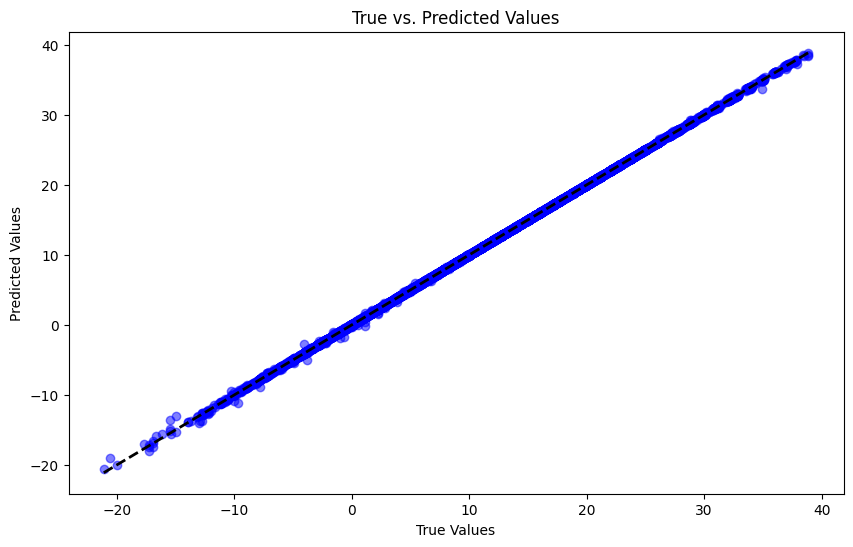

In [33]:
# Step 10: Plot Predicted vs. True Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values')
plt.show()




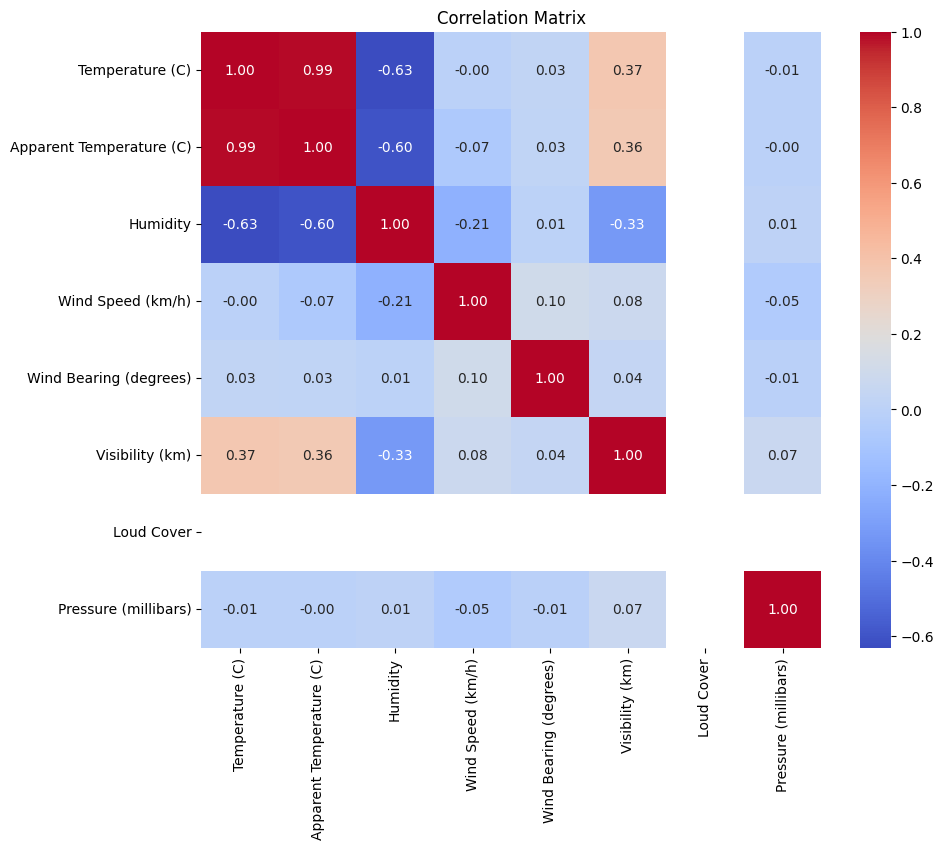

In [35]:
# Step 11: Correlation Matrix
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Question 1: What type of machine learning problem is this?
This is a regression problem. 
### Question 2: How do the features relate to each other and to the weather conditions?
Features like temperature, humidity, and wind speed are typically correlated with weather conditions.

### Question 3: What are the steps involved in preprocessing the dataset for machine learning?
1. Handle missing values.
2. Select relevant features.
3. Split the data into training and testing sets.

### Question 4: How do we select the best model for our dataset?
try different regression models and compare their performance using metrics like MSE and R^2 score.

### Question 5: What metrics should we use to evaluate the performance of our weather prediction model?
We can use Mean Squared Error (MSE) and R^2 score to evaluate the performance of our model.

### Question 6: Plot the predicted vs true values
The scatter plot shows the predicted values against the true values. Ideally, the points should lie on the diagonal line (y=x), indicating perfect predictions.
